In [2]:
import zipfile, os, shutil
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

rtdir='./data'
regions_dict = {
    'east':['akq (north east)', 'mhx (east)'],
    'central':['rah (central)', 'rnk (north central)'],
    'west':['gsp (west)']
}

def extract_dataset(remove=False) -> None:
    # Extracts dataset unless already installed
    if not os.path.exists(rtdir):
        print('Extracting NC Coast data')
        with zipfile.ZipFile(f'{rtdir}.zip', 'r') as zip_ref:
            zip_ref.extractall('./')
        organize_dataset()
        print('Done. \n')
        
    if remove: 
        print('Removing NC Coast data')
        shutil.rmtree(rtdir)
        print('Done. \n')
        
def organize_dataset() -> None:
    # Returns organized paths for regions 
    for region in regions_dict.keys():
        region_dir=os.path.join(rtdir,region)
        os.makedirs(region_dir)
        for station in regions_dict[region]:
            subdir=os.path.join(rtdir, station)
            shutil.move(subdir,
                        region_dir)
            print(f'Moved: {subdir} to {region_dir}')

class Dataset():
    #Class for each region
    def __init__(self, region=str, load_data=True, srs=False, n=30) -> None:
        self.region=region
        self.ds=pd.DataFrame()
        if load_data: self.load_data()
        self.mean_per_year()
        if srs: self.srs(n=n)

    def delete_na(self,ds=np.array([])) -> np.array([]):
        # Pops data with null entries, indexes preserved

        ds=ds[np.where(ds!='M')].astype(np.float64)
        return ds

    def srs(self,n=100) -> None:
        #Creates SRS distribution of means
        time_length=self.ds.index.__len__()
        means=np.empty((time_length))
        for year in range(time_length):
            a=self.ds.iloc[year].to_numpy()
            a=self.delete_na(a)
            sample_indexes=np.random.choice(len(a), size=n)
            means[year]=np.take(a, sample_indexes).mean()
        self.srs_dist=pd.DataFrame(means)

    def mean_per_year(self) -> None:
        time_length=self.ds.index.__len__()
        means=np.empty((time_length))
        std=np.empty((time_length))
        for year in range(time_length):
            a=self.ds.iloc[year].to_numpy()
            a=self.delete_na(a)
            means[year]=a.mean()
            std[year]=a.std()
        self.means_dist=pd.DataFrame({'means':means,'std':std})
        
    def load_csv(self, file_dir=str, name=str, key='Annual'):
        csv=pd.read_csv(file_dir)
        assert csv.shape[0]==123 # Sanity check, assert proper time frames
        return csv[key] #.drop(csv[key][(csv[key=='M'])].index) #.rename({'Annual':name}, axis='columns')[name]

    def load_data(self,) -> pd.DataFrame():
        # Prepares Pandas DF for inference
        # for region in next(os.walk(rtdir))[1]:
        
        region_dir=f'{rtdir}/{self.region}'
        for subdir in os.listdir(region_dir):
            for file in os.listdir(f'{region_dir}/{subdir}'):
                annuals=self.load_csv(f'{region_dir}/{subdir}/{file}',file[:-4])
                self.ds[file[:-4]]=annuals  
        self.ds=self.ds[20:-2]
            
def inference(ds, null=True):
    # ANOVA inference, return test statistics
    return

def display_stats():
    # Seaborn data display
    return 

if __name__ == '__main__':
    extract_dataset()
    west=Dataset('west', load_data=True)
    east=Dataset('east', load_data=True)
    central=Dataset('central', load_data=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


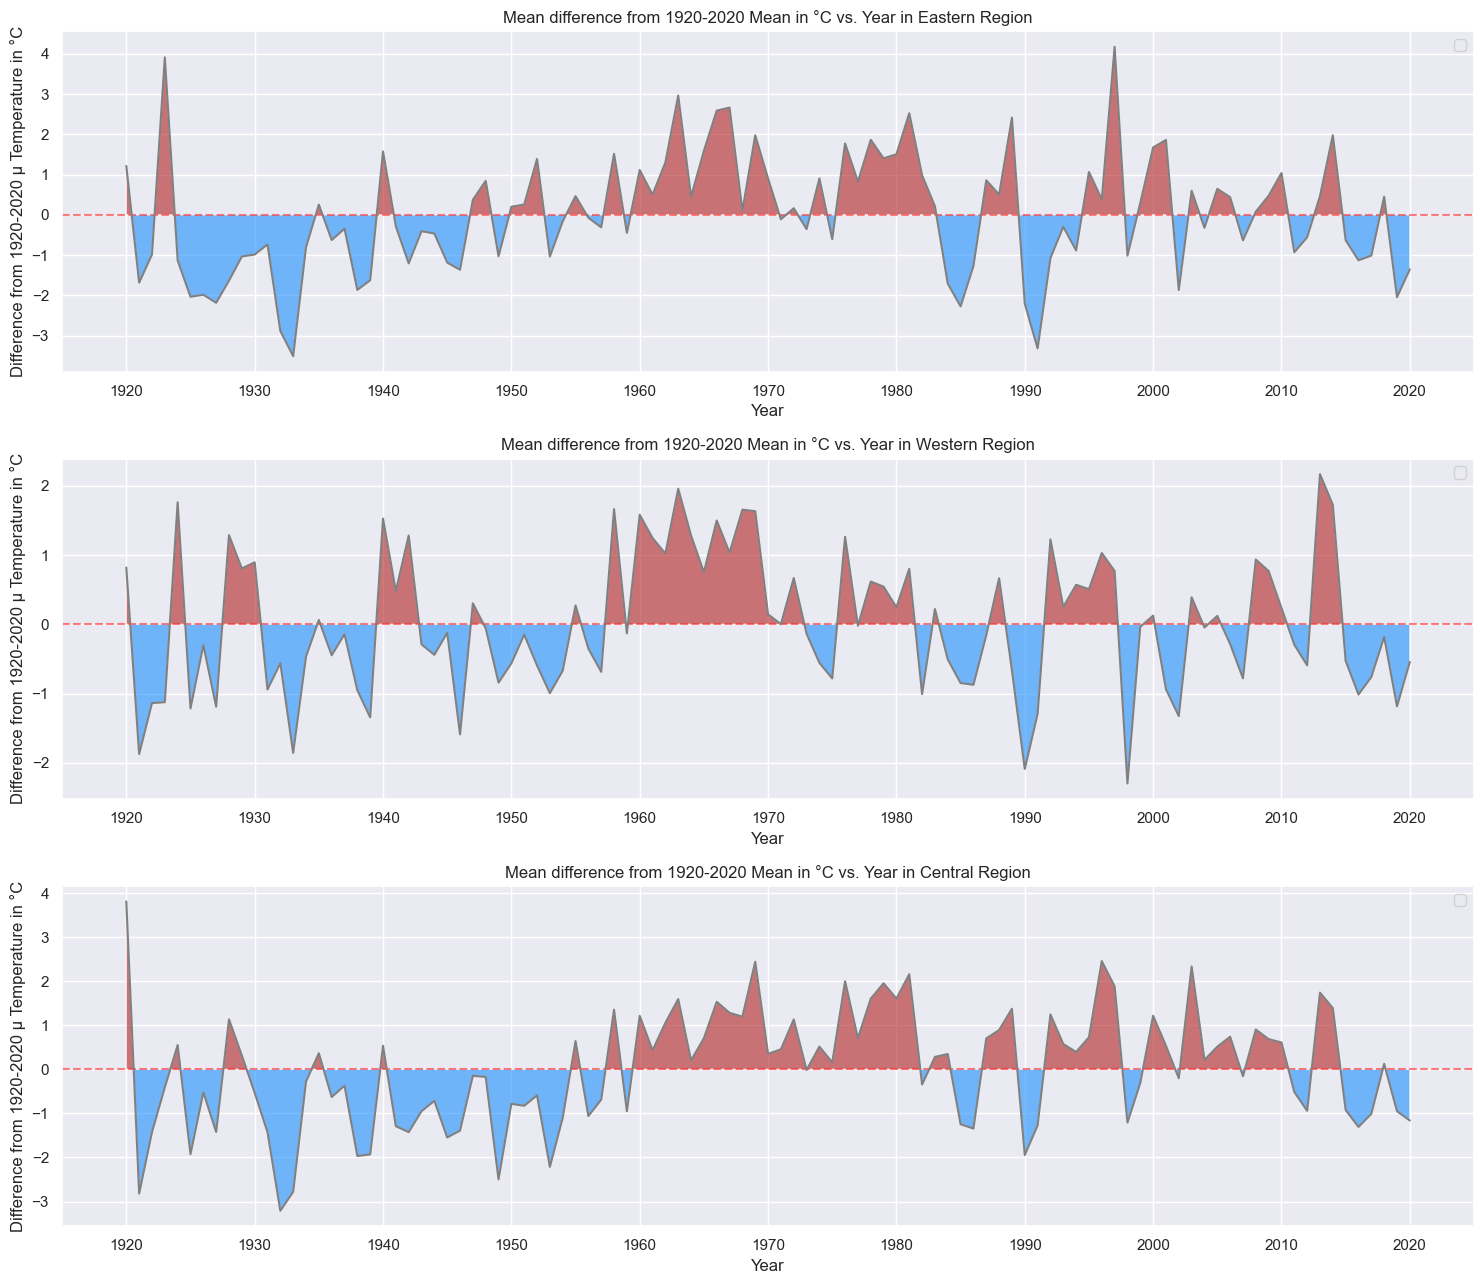

In [10]:
import seaborn as sns
from matplotlib.pyplot import GridSpec
from scipy.stats import linregress
sns.set()
#a=np.split(west.srs_dist.to_numpy(), 5)
#a[0]
plt.figure(figsize=(15,13))
times=np.arange(0,101)
meansplot_east=(east.means_dist['means'].mean()-east.means_dist['means'])
def plot(ax, a, region=str):
    ax.set_xticks(np.arange(0,110, step=10))
    ax.set_xticklabels(np.arange(start=1920, stop=2030, step=10))
    plt.axhline(0, color='red', linestyle='--', alpha=.5)
    plt.plot(a, color='gray')
    ax.fill_between(times, a,where=a>=0, interpolate=True, facecolor='firebrick', alpha=.6)
    ax.fill_between(times, a,where=a<0, interpolate=True, facecolor='dodgerblue', alpha=.6)
    #coeff=np.polyfit(times, a, 1)
    #Y_fitted=np.polyval(coeff,times)
    #plt.plot(times, Y_fitted, color='green')
    if region != None:
        plt.title(f'Mean difference from 1920-2020 Mean in °C vs. Year in {region} Region'.format(region))

    else:
        plt.title(f'Mean difference from 1920-2020 Mean in °C vs. Year in All Regions')
        
    plt.legend(loc='upper right')
    plt.xlabel('Year')
    plt.ylabel('Difference from 1920-2020 μ Temperature in °C')
    #plt.axvline()
    #plt.plot(west.srs_dist.mean()[0]-west.srs_dist[0])
    #plt.plot(east.srs_dist.mean()[0]-east.srs_dist[0])
ax=plt.subplot(311)
#plt.axvline(30, color='gray', linestyle='--', alpha=.7, label='First year global 20th century average was surpassed by yearly average (NOAA)')
plot(ax, meansplot_east, 'Eastern')
meansplot_west=(west.means_dist['means'].mean()-west.means_dist['means'])
ax=plt.subplot(312)
#plt.axvline(30, color='gray', linestyle='--', alpha=.7)
plot(ax, meansplot_west, 'Western')
ax=plt.subplot(313)
meansplot_central=(central.means_dist['means'].mean()-central.means_dist['means'])
#plt.axvline(30, color='gray', linestyle='--', alpha=.7)
plot(ax, meansplot_central, 'Central')
#plt.subplot_tool()
plt.tight_layout()

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.031   
Dependent Variable: all_means        AIC:                307.0059
Date:               2023-06-15 17:51 BIC:                312.2361
No. Observations:   101              Log-Likelihood:     -151.50 
Df Model:           1                F-statistic:        4.192   
Df Residuals:       99               Prob (F-statistic): 0.0433  
R-squared:          0.041            Scale:              1.1998  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -0.3827     0.2164   -1.7687   0.0800   -0.8120   0.0466
x1          0.0077     0.0037    2.0474   0.0433    0.0002   0.0151
-----------------------------------------------------------------
Omnibus:               2.157        Durbin-Watson:          1.375
Prob(Omnibus):   

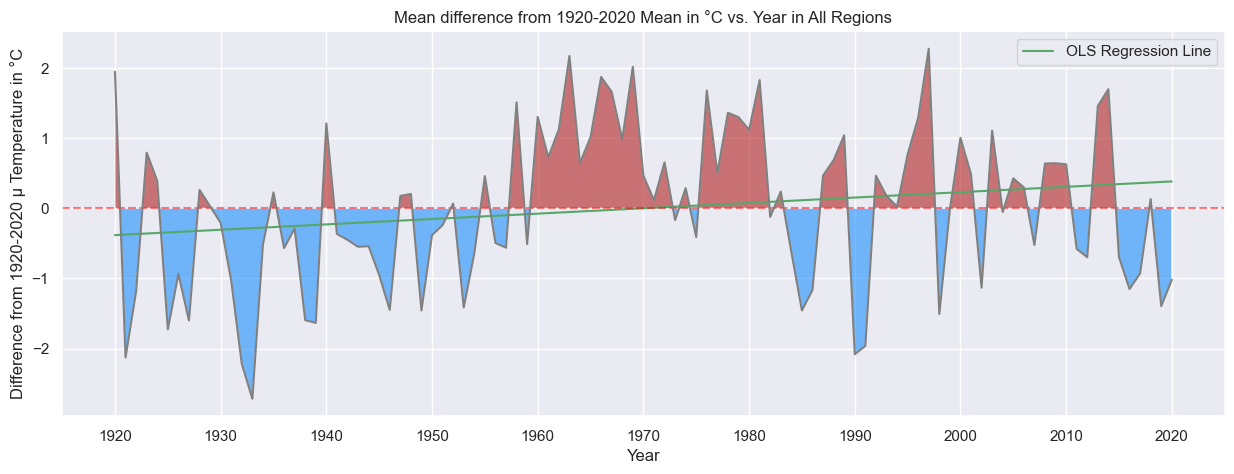

In [9]:
from scipy import stats
from sklearn.linear_model import RANSACRegressor, HuberRegressor
import statsmodels.api as sm
df_means=pd.concat([east.means_dist['means'], west.means_dist['means'], central.means_dist['means']], axis=1)
df_means['all_means'] = df_means.mean(axis=1)
plt.figure(figsize=(15,5))
ax=plt.subplot(111)
#plt.axvline(30, color='gray', linestyle='--', alpha=.7, label='First year global 20th century average was surpassed by yearly average (NOAA)')

a=df_means['all_means'].mean()-df_means['all_means']
model=sm.OLS(a,sm.add_constant(times.T))
res=model.fit()
print(res.summary2())

res.params
#ransac=HuberRegressor().fit(X=times.reshape(-1,1), y=a.to_numpy().reshape(-1,1))
#err=ransac.score(times.reshape(-1,1), a.to_numpy().reshape(-1,1))
#plt.plot(times,model.predict(model., times.reshape(-1,1)), label=f'Huber Regression Line, $R^2 = {err}$', color='green')
plt.plot(times, (times*0.007654)-0.382707, label='OLS Regression Line', linestyle='-',color='g')
plot(ax, a, None)

c:\ProgramData\Anaconda3\envs\data_sci\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03975577801041519

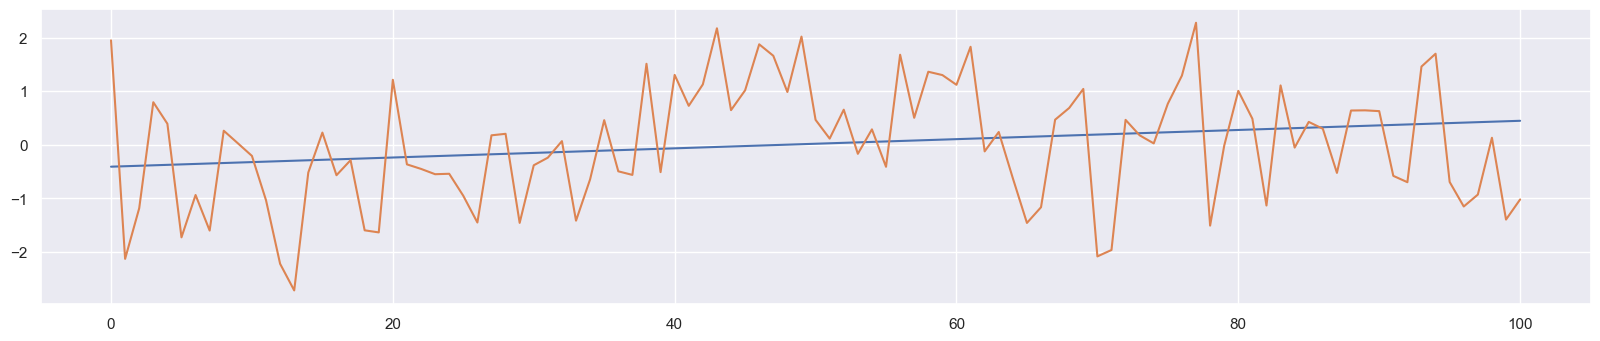

In [5]:
from scipy import stats
from sklearn.linear_model import RANSACRegressor, HuberRegressor
plt.figure(figsize=(20,13))
ax=plt.subplot(311)
huber=HuberRegressor().fit(X=times.reshape(-1,1), y=a.to_numpy().reshape(-1,1))
plt.plot(times,huber.predict(times.reshape(-1,1)))
plt.plot(times, a.to_numpy())
huber.score(times.reshape(-1,1), a.to_numpy().reshape(-1,1))


                            OLS Regression Results                            
Dep. Variable:              all_means   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.192
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0433
Time:                        17:50:47   Log-Likelihood:                -151.50
No. Observations:                 101   AIC:                             307.0
Df Residuals:                      99   BIC:                             312.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3827      0.216     -1.769      0.0

const   -0.382707
x1       0.007654
dtype: float64

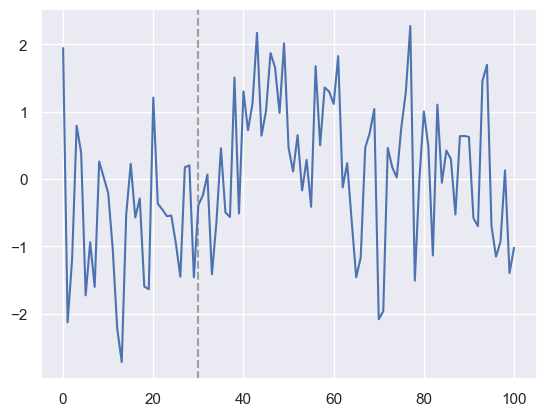

In [6]:
model=sm.OLS(a,sm.add_constant(times.T))
res=model.fit()
print(res.summary())
plt.axvline(30, color='gray', linestyle='--', alpha=.7, label='First year global 20th century average was surpassed by yearly average (NOAA)')
plt.plot(times, a)
res.params

In [7]:
df_means['all_means'].to_numpy()

array([57.38117647, 61.45477124, 60.51152778, 58.53482143, 58.93605769,
       61.05422323, 60.26481481, 60.92777778, 59.0662963 , 59.30005848,
       59.53578947, 60.36277778, 61.54758772, 62.04375   , 59.84525794,
       59.10115079, 59.8957197 , 59.61545455, 60.92319073, 60.96210784,
       58.1169281 , 59.69338235, 59.77793691, 59.87703704, 59.86870175,
       60.27968961, 60.77746032, 59.15191358, 59.12380952, 60.78468801,
       59.71047619, 59.56833333, 59.26037095, 60.74294671, 59.97186869,
       58.86948925, 59.82301613, 59.88993827, 57.81823975, 59.83815711,
       58.02536838, 58.60189043, 58.20226293, 57.15628592, 58.68241466,
       58.31282991, 57.45517473, 57.66868056, 58.34398148, 57.31132392,
       58.86330645, 59.21298611, 58.67392473, 59.49668683, 59.04096774,
       59.73865591, 57.64927338, 58.82517045, 57.96665224, 58.02858586,
       58.21025054, 57.50114846, 59.45138528, 59.08991071, 59.95208333,
       60.78518519, 60.49263558, 58.86094276, 58.64175084, 58.28